# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download&select=hypertension_data.csv

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create three new dataframes for each csv
diabetes_df = pd.read_csv(r"diabetes_data.csv")
hypertension_df = pd.read_csv(r"hypertension_data.csv")
stroke_df = pd.read_csv(r"stroke_data.csv")


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
# using .isnull.sum to find null values, and get a total of how many null values are present in each df
display(diabetes_df.isnull().sum())
display(hypertension_df.isnull().sum())
display(stroke_df.isnull().sum())

# displaying each df(s) shape to remind myself how big each df is
display(diabetes_df.shape)
display(hypertension_df.shape)
display(stroke_df.shape)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

(70692, 18)

(26083, 14)

(40910, 11)

The null values are a very small piece of each df. Also, replacing the null values with an average is not appropriate in this use case. I will drop the rows from the df that contain null values.

In [5]:
# using .dropna() to drop rows containing null values from hypertension and stroke df
hypertension_df = hypertension_df.dropna()
stroke_df = stroke_df.dropna()

display(hypertension_df.isnull().sum())
display(stroke_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

Most of my data is in the form of a yes "0" or no "1". There are some columns in each df that could contain outliers:
diabetes df: "BMI"
stroke df: "avg_glucose_level and bmi

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

45.0


np.int64(2180)

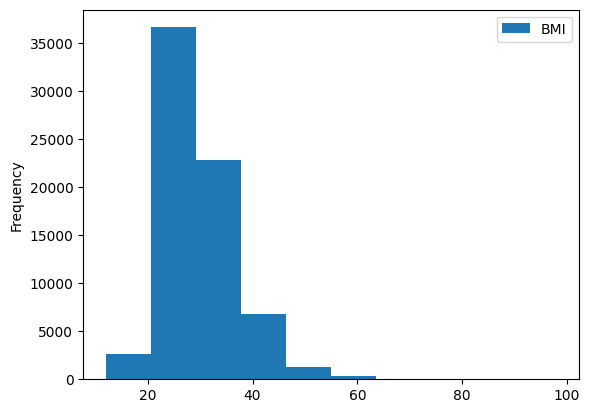

In [16]:
# using histogram to visualize outliers in diabetes df
diabetes_df.plot.hist(column="BMI")

# using IQR to find upper a lower fences
display(diabetes_df['BMI'].describe())
iqr_dbdf=33-25
upper_fence_dbdf= 33 + 1.5 * iqr_dbdf
print(upper_fence_dbdf)
display((diabetes_df['BMI'] > 45).sum())


<Axes: ylabel='Frequency'>

<Axes: ylabel='Frequency'>

count    40907.000000
mean        30.406488
std          6.835305
min         11.500000
25%         25.900000
50%         29.400000
75%         34.100000
max         92.000000
Name: bmi, dtype: float64

46.400000000000006


np.int64(915)

count    40907.000000
mean       122.079679
std         57.561951
min         55.120000
25%         78.750000
50%         97.920000
75%        167.590000
max        271.740000
Name: avg_glucose_level, dtype: float64

300.85


np.int64(0)

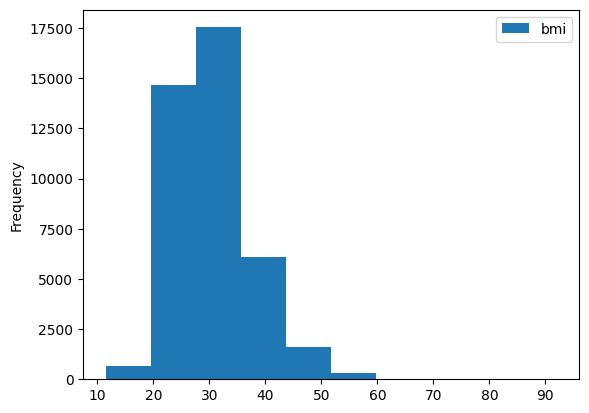

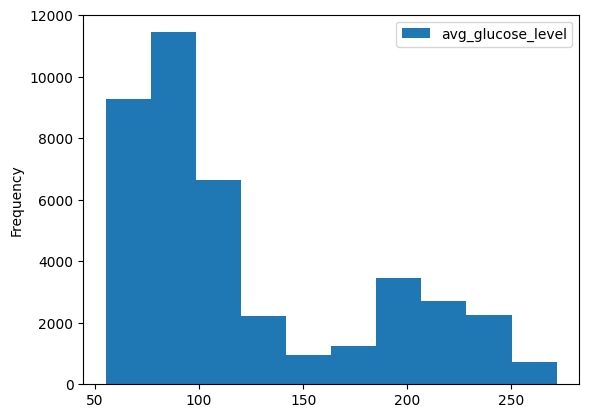

In [21]:
# using histogram to visualize outliers in stroke df
display(stroke_df.plot.hist(column="bmi"))
display(stroke_df.plot.hist(column="avg_glucose_level"))


# using IQR to find upper a lower fences
display(stroke_df['bmi'].describe())
iqr_strokebmi=34.1-25.9
upper_fence_strokebmi= 34.1 + 1.5 * iqr_strokebmi
# lower_fence_strokeavg_glucose= 167.59 + 1.5 * iqr_strokeavg_glucose
print(upper_fence_strokebmi)
display((stroke_df['bmi'] > 46.4).sum())

display(stroke_df['avg_glucose_level'].describe())
iqr_strokeavg_glucose=167.59-78.75
upper_fence_strokeavg_glucose= 167.59 + 1.5 * iqr_strokeavg_glucose
# lower_fence_strokeavg_glucose= 167.59 + 1.5 * iqr_strokeavg_glucose
print(upper_fence_strokeavg_glucose)
display((stroke_df['avg_glucose_level'] > 300.85).sum())


In [30]:
# display((stroke_df['Age'] < 18).sum())
stroke_df = stroke_df[stroke_df['Age'] >= 18]
display((stroke_df['Age'] < 18).sum())


np.int64(0)

Outliers present:
Daibetes_df "BMI" = upper fence .03%, lower fence
stroke_df = 
"bmi": upper fence, lower fence
"avg_glucose_level": upper fence, lower fence

Because the amount of outliers present in the diabetes_df "BMI" column are so minimal, (.03%), I will leave them in this df. This also applies to the "bmi" column in the stroke_df (.002%). The 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

My business issue is looking into which lifestyle factors are positively and negatively associated with each chronic disease. The hypertension df focuses more on health markers, and does not include any lifestyle data. I will drop this df and only join my diabetes and stroke dfs. No action items for now. 

I may also decide to remove "HighChol" and "BMI" from diabetes_df as well as "avg_glucose_level" and "bmi" from the stroke_df. I will leave them for now in case I do choose to include them in visualizations. 

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [27]:
#  I will clean up columns headers to match where possible in each df. 
# diabetes_df.columns=['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'smoker',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DifficultyWalk',
#        'Stroke', 'HighBP', 'Diabetes']
diabetes_df.columns
# stroke_df.columns=['Sex', 'Age', 'Hypertension', 'HeartDisease', 'EverMarried',
#        'WorkType', 'ResidenceType', 'AvgGlucoseLevel', 'BMI',
#        'SmokingStatus', 'Stroke']
stroke_df.columns

# I will also combine the age in years in the stroke df to match the categories used in the diabetes df. I will use a function to do so.
def years_to_categories(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 29:
        return 2
    elif 30 <= age <= 34:
        return 3 
    elif 35 <= age <= 39:
        return 4
    elif 40 <= age <= 44:
        return 5
    elif 45 <= age <= 49:
        return 6
    elif 50 <= age <= 54:
        return 7
    elif 55 <= age <= 59:
        return 8
    elif 60 <= age <= 64:
        return 9
    elif 65 <= age <= 69:
        return 10
    elif 70 <= age <= 74:
        reutrn 11
    elif 75 <= age <= 79:
        return 12
    elif age >= 80:
        return 13

stroke_df[]
    1=18-24 2=25-29 3=30-34 4=35-39 5=40-44 6=45-49 7=50-54 8=50-59 9=60-64 10=65-69 11=70-74 12=75-79 13=80 or older

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DifficultyWalk', 'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Yes, all four types of dirty data was found in my dataset. However, I did not find the need to clean all of this data as it was not neccessary for each case. 

2. Did the process of cleaning your data give you new insights into your dataset?
Yes - I found myself more hesitant to clean certain data as I kept asking myself "will this serve me in the future?" Also, my dfs are so large, the data that needed to be cleaned was so nominal, it likely will not cause much of a difference if it is left in the df. Also, the business issue at hand does not necessarily deal with alot of the data I found that needed cleaning. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
I need to think about how I want to join these dfs into one to make them easier to work out of. 